In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import files

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [ ]:
uploaded = files.upload()
df = pd.read_csv("SCMS_Delivery_History_Dataset.csv")
df.head()

Saving SCMS_Delivery_History_Dataset.csv to SCMS_Delivery_History_Dataset (1).csv


,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [ ]:
missing_df = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Percentage (%)': df.isnull().mean() * 100
}).sort_values(by='Missing Values', ascending=False)

print(missing_df[missing_df['Missing Values'] > 0])

                           Missing Values  Percentage (%)
Dosage                               1736       16.815188
Shipment Mode                         360        3.487021
Line Item Insurance (USD)             287        2.779930


In [ ]:

df['Dosage'] = df['Dosage'].fillna('Unknown')

df['Shipment Mode'] = df['Shipment Mode'].fillna(df['Shipment Mode'].mode()[0])

df['Line Item Insurance (USD)'] = df['Line Item Insurance (USD)'].fillna(df['Line Item Insurance (USD)'].median())


In [ ]:
date_cols = ['Scheduled Delivery Date', 'Delivered to Client Date', 'Delivery Recorded Date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [ ]:
df['Weight (Kilograms)'] = pd.to_numeric(df['Weight (Kilograms)'], errors='coerce')
df['Freight Cost (USD)'] = pd.to_numeric(df['Freight Cost (USD)'], errors='coerce')

In [ ]:
df['Delivery Delay'] = (df['Delivered to Client Date'] - df['Scheduled Delivery Date']).dt.days

# **Univariate Analysis**

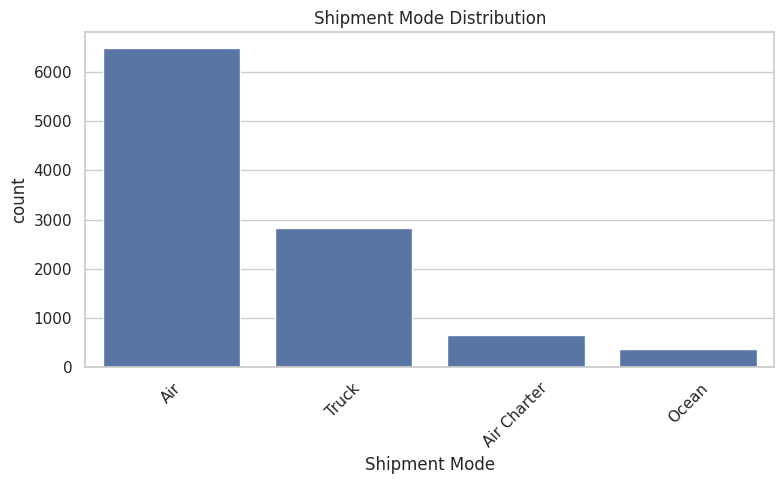

In [ ]:

# Shipment Mode Distribution

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Shipment Mode')
plt.title("Shipment Mode Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

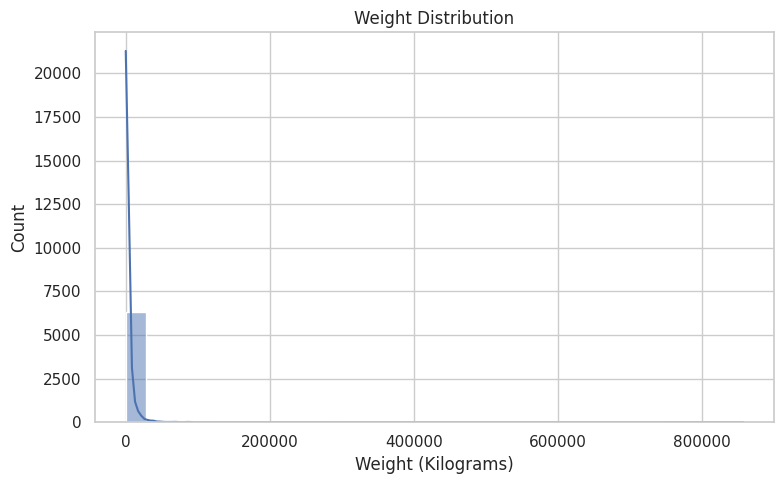

In [ ]:
# Weight Distribution

plt.figure(figsize=(8,5))
sns.histplot(df['Weight (Kilograms)'], kde=True, bins=30)
plt.title("Weight Distribution")
plt.tight_layout()
plt.show()

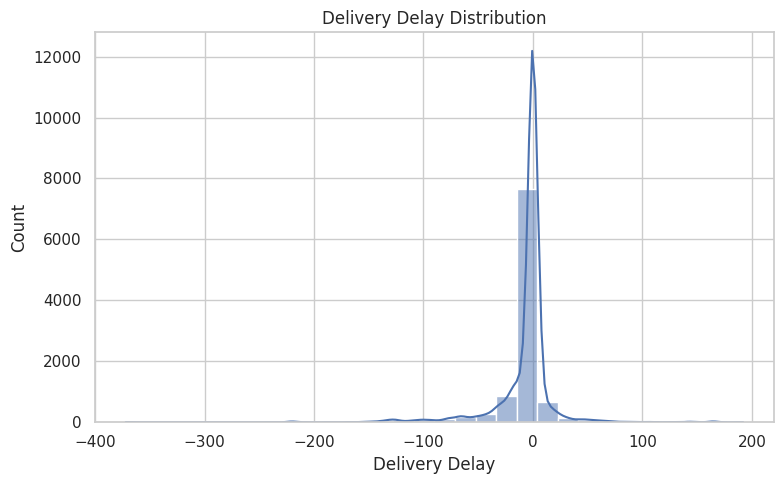

In [ ]:
# Delivery Delay Analysis

plt.figure(figsize=(8, 5))
sns.histplot(df['Delivery Delay'], kde=True, bins=30)
plt.title("Delivery Delay Distribution")
plt.tight_layout()
plt.show()

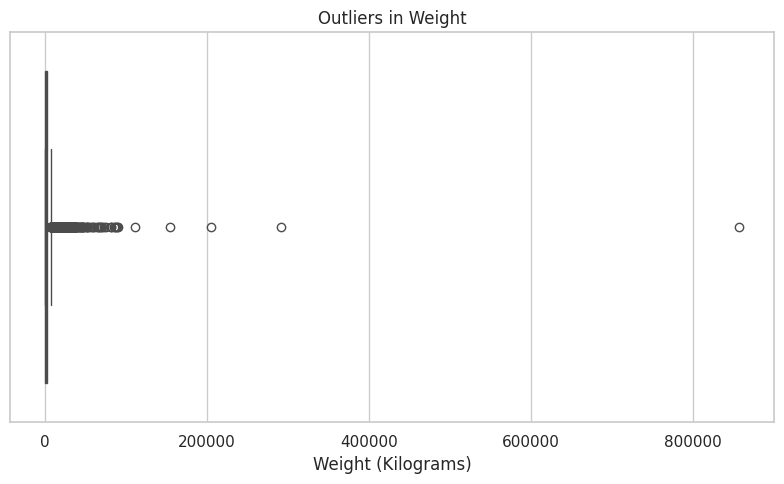

In [ ]:
# Outlier Detection

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Weight (Kilograms)'])
plt.title("Outliers in Weight")
plt.tight_layout()
plt.show()

# **Bivariate Analysis**

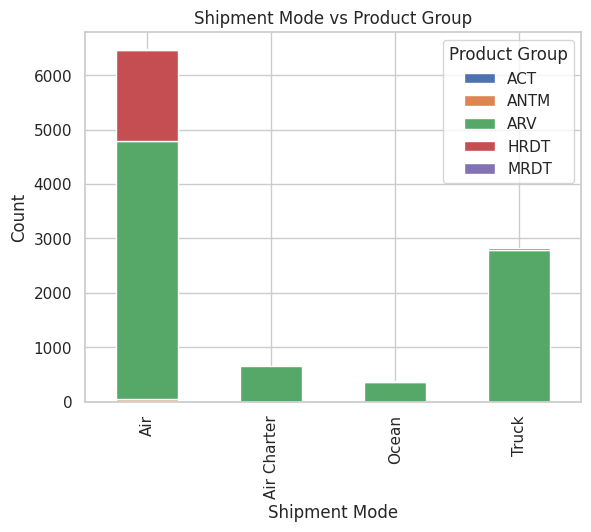

In [ ]:
# Shipment Mode vs Product Group

pd.crosstab(df['Shipment Mode'], df['Product Group']).plot(kind='bar', stacked=True)
plt.title("Shipment Mode vs Product Group")
plt.ylabel("Count")
plt.show()

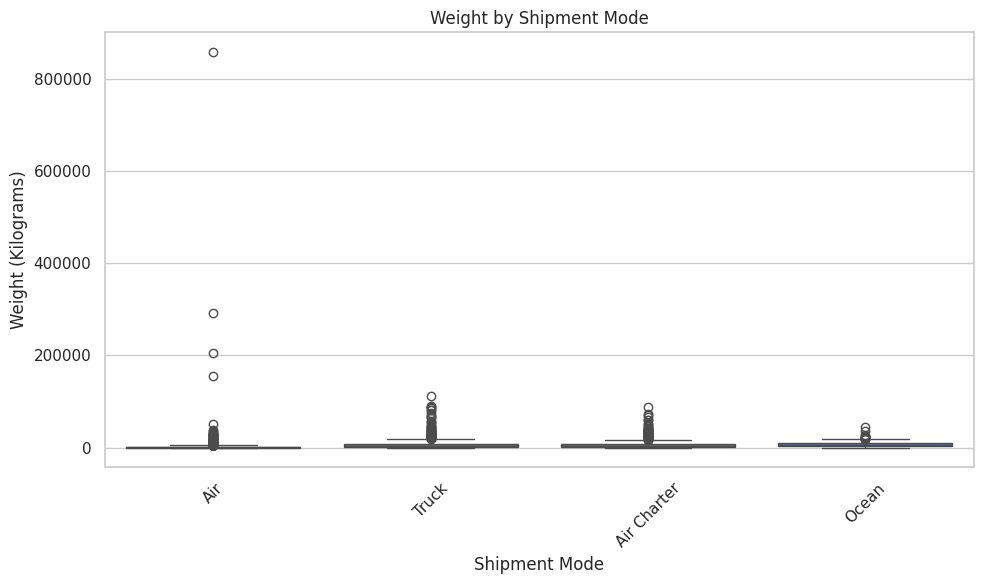

In [ ]:
# Boxplot of Weight by Shipment Mode

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Shipment Mode', y='Weight (Kilograms)')
plt.title("Weight by Shipment Mode")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Multivariate Analysis**

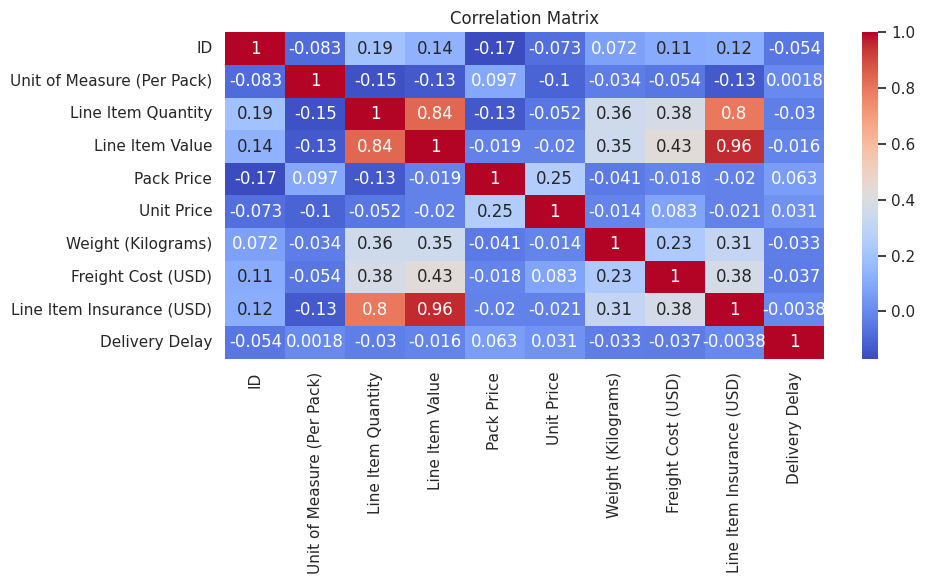

In [ ]:
# Correlation Heatmap

plt.figure(figsize=(10, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [ ]:
# Interactive Scatter Plot (Plotly)

fig = px.scatter(df, x='Weight (Kilograms)', y='Delivery Delay', color='Shipment Mode',
                 title='Weight vs Delivery Delay by Shipment Mode')
fig.show()

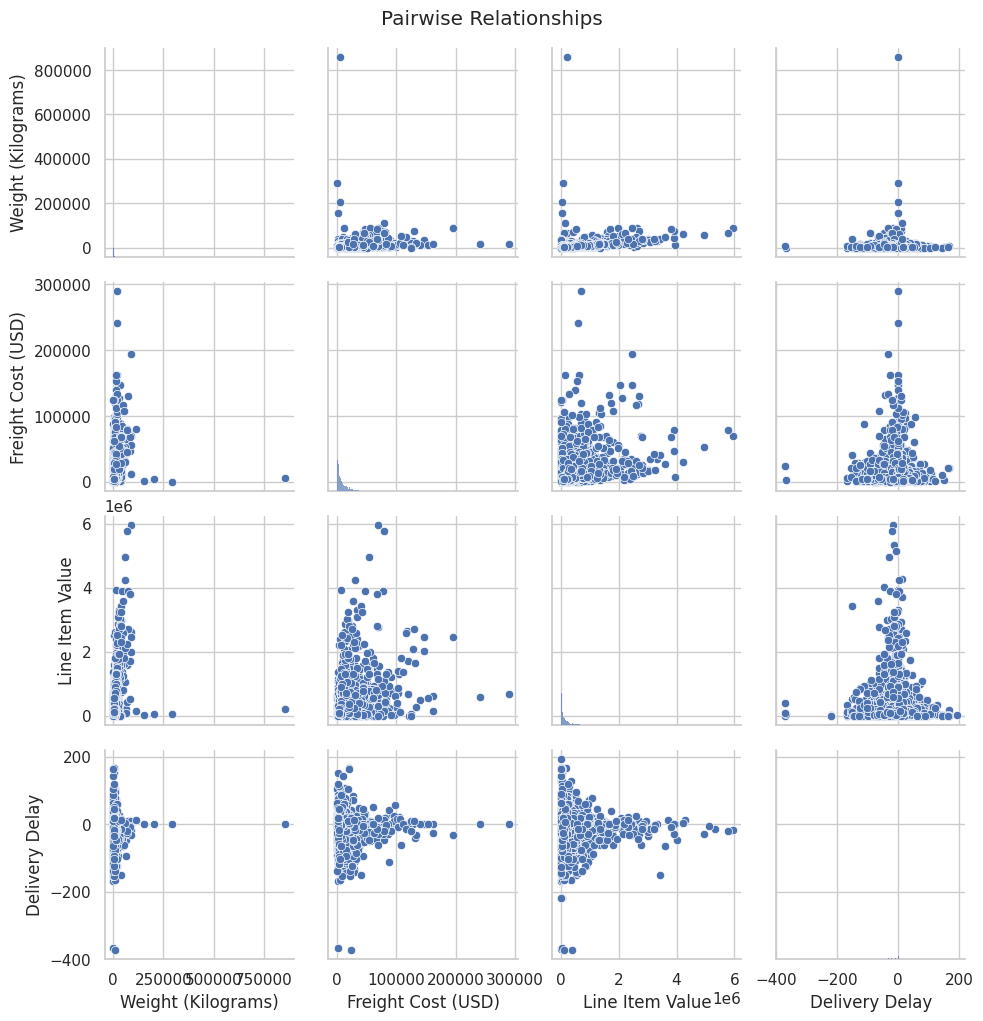

In [ ]:
# Pairplot

sns.pairplot(df[['Weight (Kilograms)', 'Freight Cost (USD)', 'Line Item Value', 'Delivery Delay']])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

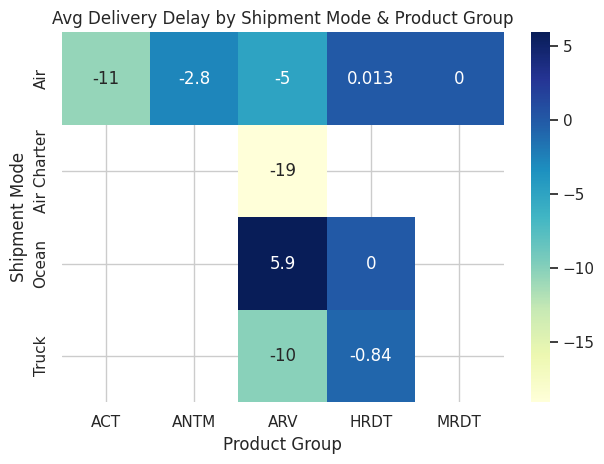

In [ ]:
# Heatmap of Avg Delivery Delay by Shipment Mode & Product Group

pivot_table = df.pivot_table(index='Shipment Mode', columns='Product Group', values='Delivery Delay', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu")
plt.title("Avg Delivery Delay by Shipment Mode & Product Group")
plt.tight_layout()
plt.show()

In [ ]:
# 3D Scatter Plot

fig = px.scatter_3d(df, x='Weight (Kilograms)', y='Freight Cost (USD)', z='Delivery Delay',
                    color='Shipment Mode', title='3D Scatter: Weight, Cost, Delay')
fig.show()